<a href="https://colab.research.google.com/github/YazhiniSiVakumar22/DATA-ANALYTICS-PROJECTS/blob/main/covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od
od.download()

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [70]:
# Load dataset
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
data = pd.read_csv(url)

In [71]:
# Display basic information about the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [72]:
# Selecting relevant columns
covid_data = data[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]
covid_data['date'] = pd.to_datetime(covid_data['date'])

<ipython-input-72-a05aac1c5370>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# Handling missing values
covid_data.fillna(0,inplace=True)

<ipython-input-73-1d42cd5f1963>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

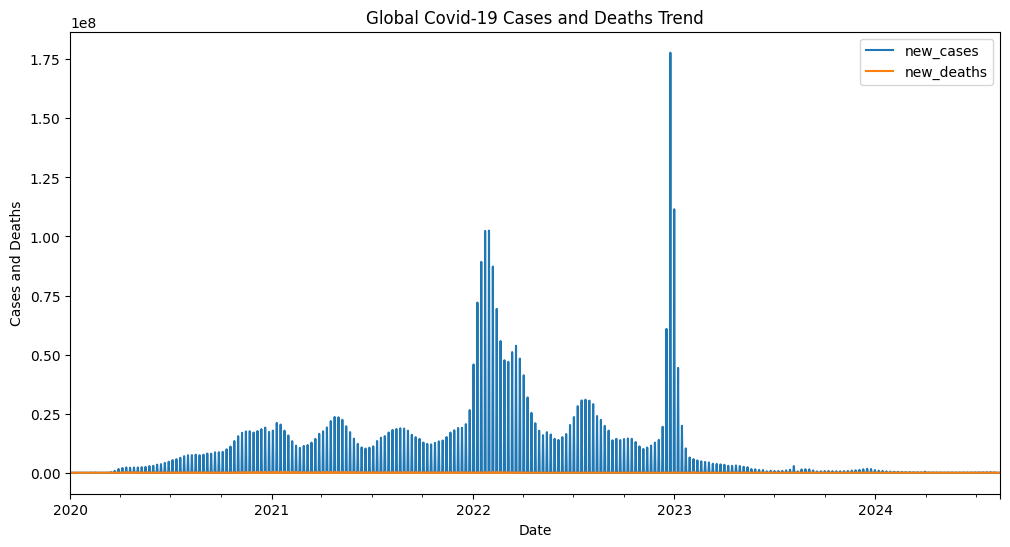

In [75]:
# global covid19 -trend over time
plt.figure(figsize=(10,6))
global_cases=covid_data.groupby('date')[['new_cases','new_deaths']].sum()
global_cases.plot(kind='line',figsize=(12,6))
plt.title("Global Covid-19 Cases and Deaths Trend")
plt.xlabel("Date")
plt.ylabel("Cases and Deaths")
plt.show



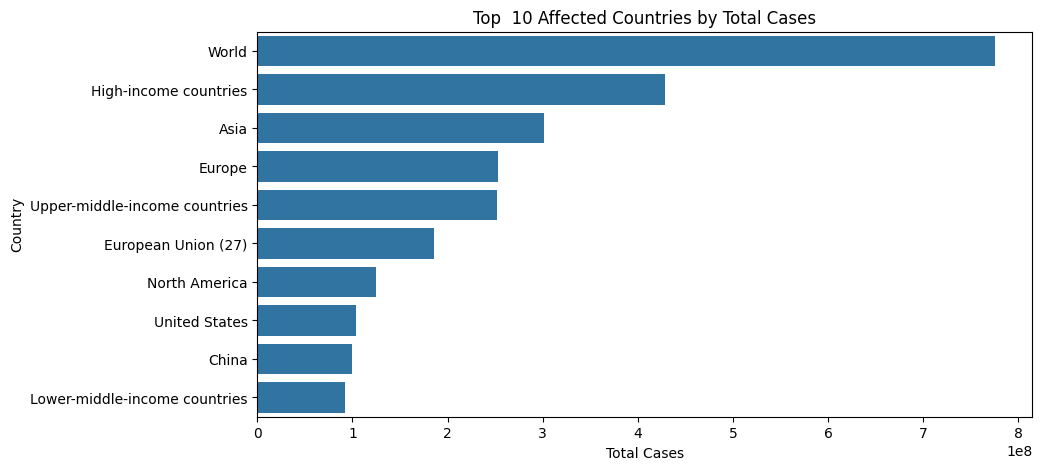

In [82]:
# Top 10  affected countries by total cases
top_countries=covid_data.groupby('location')[['total_cases']].max().nlargest(10,'total_cases')
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.total_cases, y=top_countries.index,data=top_countries)
plt.title("Top  10 Affected Countries by Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

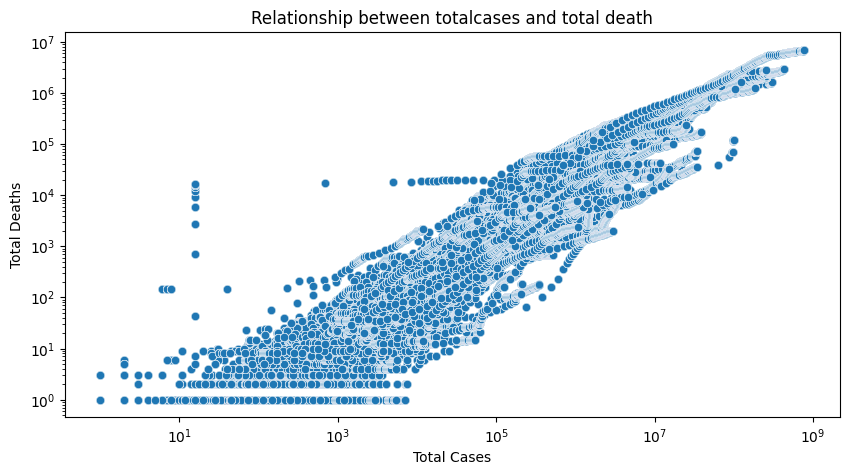

In [85]:
# relationship between totalcases and total death
plt.figure(figsize=(10,5))
sns.scatterplot(x='total_cases', y='total_deaths',data=covid_data,alpha=0.5)
plt.title("Relationship between totalcases and total death")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.xscale('log')
plt.yscale('log')
plt.show()


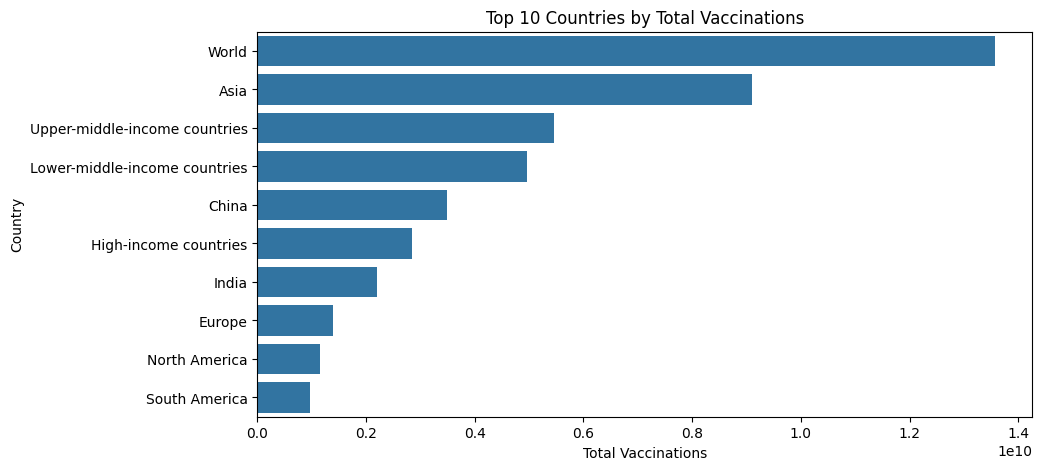

In [87]:
# vaccination process analaysis
top_vaccinated_countries=covid_data.groupby('location') [['total_vaccinations']].max().nlargest(10,'total_vaccinations')
plt.figure(figsize=(10,5))
sns.barplot(x=top_vaccinated_countries.total_vaccinations,y=top_vaccinated_countries.index,data=top_vaccinated_countries)
plt.title("Top 10 Countries by Total Vaccinations")
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")
plt.show()
